# Cis-eQTL Cis-pQTL Colocalization

**Created**: 23 March 2022

## Environment

In [1]:
library(tidyverse)
library(data.table)
library(coloc)

setwd("~/eQTL_pQTL_Characterization/")

source("01_Colocalization/scripts/utils/ggplot_theme.R")

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


This is coloc version 5.1.1



## Load Summary Information

In [2]:
eqtl.pqtl.meta <- read.table("/nfs/users/nfs_n/nm18/gains_team282/nikhil/colocalization/eQTL_pQTL_metadata.tsv", sep="\t", header=TRUE)

In [3]:
head(eqtl.pqtl.meta)

,Protein,Accession,Entry.Name,Gene.Names,Protein.Length,Coverage,Protein.Existence,Description,UniProt_ID,Gene_ID,⋯,feature,start,end,score,strand,frame,gene_id,gene_name,gene_biotype,tss
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,sp|A0A075B6I9|LV746_HUMAN,A0A075B6I9,LV746_HUMAN,IGLV7-46,117,76.9,3:Protein inferred from homology,Immunoglobulin lambda variable 7-46,A0A075B6I9,ENSG00000211649,⋯,gene,22369614,22370087,.,+,.,ENSG00000211649,IGLV7-46,IG_V_gene,22369614
2,sp|A0A075B6P5|KV228_HUMAN,A0A075B6P5,KV228_HUMAN,IGKV2-28,120,100.0,3:Protein inferred from homology,Immunoglobulin kappa variable 2-28,A0A075B6P5,ENSG00000244116,⋯,gene,89221698,89222461,.,-,.,ENSG00000244116,IGKV2-28,IG_V_gene,89222461
3,sp|A0A075B6P5|KV228_HUMAN,A0A075B6P5,KV228_HUMAN,IGKV2-28,120,100.0,3:Protein inferred from homology,Immunoglobulin kappa variable 2-28,A0A075B6P5,ENSG00000282025,⋯,,NA,NA,,,,,,,NA
4,sp|A0A087WSY6|KVD15_HUMAN,A0A087WSY6,KVD15_HUMAN,IGKV3D-15,115,96.5,3:Protein inferred from homology,Immunoglobulin kappa variable 3D-15,A0A087WSY6,ENSG00000224041,⋯,gene,90114838,90115402,.,+,.,ENSG00000224041,IGKV3D-15,IG_V_gene,90114838
5,sp|A0A087WW87|KV240_HUMAN,A0A087WW87,KV240_HUMAN,IGKV2-40,121,81.0,3:Protein inferred from homology,Immunoglobulin kappa variable 2-40,A0A087WW87,ENSG00000273962,⋯,gene,89330110,89330429,.,-,.,ENSG00000273962,IGKV2-40,IG_V_gene,89330429
6,sp|A0A0B4J1V0|HV315_HUMAN,A0A0B4J1V0,HV315_HUMAN,IGHV3-15,119,84.0,3:Protein inferred from homology,Immunoglobulin heavy variable 3-15,A0A0B4J1V0,ENSG00000282290,⋯,,NA,NA,,,,,,,NA


In [4]:
cis.pqtl.summary <- readRDS("/nfs/users/nfs_n/nm18/gains_team282/proteomics/pqtl/pqtl_ms2019/cis_pqtl_all.RDS")
cis.pqtl.sig <- readRDS("/nfs/users/nfs_n/nm18/gains_team282/proteomics/pqtl/pqtl_ms2019/cis_pqtl_sig.RDS")

In [5]:
head(cis.pqtl.summary)

,SNP,Chr,Position,pQTL_beta,pQTL_SE,pQTL_t,pQTL_pval,pQTL_Protein,Gene
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,rs61776531,1,26375588,0.004320156,0.02291136,0.18855956,0.8504461,O75636,ENSG00000142748
2,rs12565739,1,26377395,0.004367981,0.02288906,0.19083272,0.8486646,O75636,ENSG00000142748
3,rs12042111,1,26378326,0.004367981,0.02288906,0.19083272,0.8486646,O75636,ENSG00000142748
4,rs12037475,1,26379149,-0.001510609,0.02286355,-0.06607064,0.9473275,O75636,ENSG00000142748
5,rs12043283,1,26380003,-0.001510609,0.02286355,-0.06607064,0.9473275,O75636,ENSG00000142748
6,rs12042863,1,26381414,0.001299531,0.02255591,0.05761375,0.9540612,O75636,ENSG00000142748


In [6]:
length(unique(cis.pqtl.summary$pQTL_Protein))

[1] 259

In [7]:
length(unique(cis.pqtl.summary$Gene))

[1] 260

Which proteins are associated with more than one gene?

In [8]:
cis.pqtl.summary %>%
    dplyr::select(pQTL_Protein, Gene) %>%
    unique() %>%
    dplyr::group_by(pQTL_Protein) %>%
    dplyr::summarize(N=n(), Genes=paste0(Gene, collapse="|")) %>%
    dplyr::arrange(desc(N)) %>%
    head()

pQTL_Protein,N,Genes
<chr>,<int>,<chr>
P59665,2,ENSG00000206047|ENSG00000240247
A0A075B6I9,1,ENSG00000211649
A0A075B6P5,1,ENSG00000244116
A0A087WW87,1,ENSG00000273962
A0A0B4J1V0,1,ENSG00000211943
A0A0B4J1V2,1,ENSG00000211951


In [9]:
cis.eqtl.summary <- do.call(rbind, lapply(1:22, function(chr) {
    fread(paste0("/nfs/users/nfs_n/nm18/gains_team282/nikhil/colocalization/cis_eqtl/conditional_effects/LMM/chr", chr, "_conditional_cis_eQTL_summary_statistics.tsv")) %>%
        as.data.frame() %>%
        dplyr::filter(Gene %in% cis.pqtl.summary$Gene)
}))

In [10]:
head(cis.eqtl.summary)

,Gene,Signal,Chr,SNP,Position,Beta,SE,P_Value
,<chr>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,ENSG00000000971,1,1,rs1009188,197287960,-0.0431792804,0.03260455,0.1858082
2,ENSG00000000971,1,1,rs1011673,195944301,0.0422601284,0.02917841,0.1479048
3,ENSG00000000971,1,1,rs10157380,196218579,0.0498352954,0.03949230,0.2075017
4,ENSG00000000971,1,1,rs10157465,197343812,0.0003986006,0.04737622,0.9932875
5,ENSG00000000971,1,1,rs10158703,196218838,0.0498352954,0.03949230,0.2075017
6,ENSG00000000971,1,1,rs10218789,195740069,-0.0233229062,0.02819979,0.4084017


Are all cis-pQTL also cis-eQTL? Nope, only 97 of the 260 genes are eQTL also.

In [11]:
length(unique(cis.eqtl.summary$Gene))

[1] 97

Split summary statistics by locus.

In [12]:
cis.eqtl.loci <- split(cis.eqtl.summary, cis.eqtl.summary$Gene)
cis.pqtl.loci <- split(cis.pqtl.summary, cis.pqtl.summary$Gene)

## Load Gene and Protein Expression

In [13]:
gene.exp <- read.table("/lustre/scratch119/humgen/projects/gains_team282/eqtl/data/logcpm_864_20412_hla.txt")
gene.exp <- t(gene.exp)
rownames(gene.exp) <- gsub("^GA", "", rownames(gene.exp))

In [14]:
head(gene.exp)

,ENSG00000230521,ENSG00000225864,ENSG00000227766,ENSG00000237669,ENSG00000271581,ENSG00000285647,ENSG00000204435,ENSG00000231074,ENSG00000227262,ENSG00000206337,⋯,ENSG00000288253,ENSG00000288302,ENSG00000288349,ENSG00000288393,ENSG00000288398,ENSG00000288538,ENSG00000288559,ENSG00000288562,ENSG00000288573,ENSG00000288582
UK02270173_3,0.6644339,0.9817872,1.2117156,0.6420763,2.474490,0.00000000,3.704888,4.027339,0.06866465,7.318038,⋯,0.5247755,1.3000450,0.5247755,0.92735960,1.133738,1.1337380,0.9457312,0.87079780,0.31467050,2.811486
UK15130120_3,0.5827160,0.4387994,0.3068267,0.6925683,1.331531,0.03379072,4.261280,3.634898,0.25046090,6.369198,⋯,0.5125515,1.7424980,0.4883840,0.06680807,1.860177,0.6496258,0.9264084,0.06680807,0.22143010,3.343063
UK58000006_3,0.4046756,0.6022344,0.6625010,0.9792012,1.831046,0.00000000,3.719682,3.597655,0.00000000,6.837021,⋯,0.2947282,1.5250610,0.6326824,0.66250100,1.315821,1.4755270,1.0258310,0.29472820,0.13374420,4.010874
UK47010004_3,0.2090516,0.9234049,0.7996329,0.6992958,2.475317,0.05517067,4.169617,3.016982,0.30321616,7.723203,⋯,0.3032162,0.9527571,1.0911770,0.30321620,1.143029,1.8370600,0.7669565,0.25690200,0.10830900,2.610379
UK42020088_5,0.2211571,0.2211571,0.6445686,0.3765156,1.881204,0.67482702,4.527758,3.624300,0.04702687,6.350747,⋯,0.0925691,1.2174450,0.6748270,0.13671760,1.088510,2.0637890,0.8172741,0.04702687,0.22115710,2.434768
UK47490007_3,0.4288519,1.1450686,0.3130290,1.0756817,2.053137,0.00000000,4.581986,3.101136,0.00000000,6.728267,⋯,0.5012039,1.9916780,1.1895390,0.35267880,1.211271,0.7590055,0.6033524,1.02749800,0.09657541,3.816079


In [15]:
pqtl.geno <- fread("/nfs/users/nfs_n/nm18/gains_team282/Genotyping/All_genotyping_merged_filtered_b38_refiltered_rsID.fam", drop=3:6)
colnames(pqtl.geno) <- c("family", "individual")
protein.exp <- read.csv("/lustre/scratch119/humgen/projects/gains_team282/proteomics/MS2019_processed_data/data_291x1860_MS2019.csv", row.names=1)
protein.exp <- t(protein.exp)
rownames(protein.exp) <- gsub("^X", "", gsub("\\..*$", "", rownames(protein.exp)))
protein.info <- read.csv("/lustre/scratch119/humgen/projects/gains_team282/proteomics/MS2019_processed_data/sample_info_1860_MS2019.csv", row.names=1)
protein.info <- protein.info %>%
    dplyr::filter(Patient %in% pqtl.geno$individual)
protein.info$Patient <- gsub("^GA", "", protein.info$Patient)
protein.exp <- protein.exp[paste0(protein.info$Injection),]

In [16]:
head(protein.exp)

,A0A075B6I9,A0A075B6P5,A0A087WW87,A0A0B4J1V0,A0A0B4J1V2,A0A0B4J1V6,A0A0C4DH31,A0A0C4DH38,A0A0C4DH72,A2VEC9,⋯,A6NJ88,A1L157,P51159,Q16651,Q8N2U0,Q92527,Q969V1,Q96BR1,Q86VK4,P11309
3439,14.06345,16.03609,15.50883,17.24218,15.51442,12.31986,13.16036,10.45236,12.21718,13.56052,⋯,16.83735,16.45940,13.20547,14.32942,13.36351,14.42539,15.60032,11.94983,14.23356,12.40308
3440,14.25070,13.03507,11.92701,17.42626,17.30772,12.15789,14.40737,13.44694,11.94252,13.98888,⋯,13.48823,15.69690,13.67583,14.95902,13.37234,14.83777,15.51079,11.73576,14.14074,12.39263
3441,15.02175,16.21867,11.63172,16.83393,15.82620,12.19347,14.19060,13.89406,11.88166,14.30399,⋯,15.89227,13.91093,13.71481,13.77387,13.49517,14.86029,15.37486,11.84970,14.94318,12.00046
3442,14.51218,12.77215,12.62772,16.83453,16.02655,11.92471,14.63931,13.94733,11.86421,14.11091,⋯,14.23426,15.79861,13.70199,14.74071,14.88895,14.60881,15.40724,12.30258,15.02014,11.31928
3443,15.26602,12.62202,11.30896,16.82177,16.24261,12.21507,14.17042,12.75975,11.90041,14.28217,⋯,14.45529,15.21440,13.33776,14.71806,14.73925,14.69318,15.41036,11.92065,15.00276,10.80000
3444,14.64062,16.35344,11.26297,17.31887,15.64070,12.84245,14.26904,13.95091,12.90014,14.13249,⋯,13.18055,14.29860,13.58296,13.89738,14.48849,14.37257,15.56780,11.80031,14.95080,11.28800


## COLOC

In [17]:
coloc.res <- do.call(rbind, lapply(names(cis.eqtl.loci), function(gene) {
    
    cis.eqtl.signals <- split(cis.eqtl.loci[[gene]], cis.eqtl.loci[[gene]]$Signal)

    signal.res = do.call(rbind, lapply(names(cis.eqtl.signals), function(eqtl.signal) {

        cis.eqtl.signals[[eqtl.signal]] <- cis.eqtl.signals[[eqtl.signal]] %>%
            dplyr::filter(!is.na(Beta))

        cis.eqtl.locus <- list()
        cis.eqtl.locus$beta <- cis.eqtl.signals[[eqtl.signal]]$Beta
        cis.eqtl.locus$varbeta <- cis.eqtl.signals[[eqtl.signal]]$SE^2
        cis.eqtl.locus$snp <- cis.eqtl.signals[[eqtl.signal]]$SNP
        cis.eqtl.locus$position <- cis.eqtl.signals[[eqtl.signal]]$Position
        cis.eqtl.locus$type <- "quant"
        cis.eqtl.locus$sdY <- sd(gene.exp[,gene], na.rm=TRUE)

        cis.pqtl.locus <- list()
        cis.pqtl.locus$beta <- cis.pqtl.loci[[gene]]$pQTL_beta
        cis.pqtl.locus$varbeta <- cis.pqtl.loci[[gene]]$pQTL_SE^2
        cis.pqtl.locus$snp <- cis.pqtl.loci[[gene]]$SNP
        cis.pqtl.locus$position <- cis.pqtl.loci[[gene]]$Position
        cis.pqtl.locus$type <- "quant"
        cis.pqtl.locus$sdY <- sd(protein.exp[,eqtl.pqtl.meta$UniProt_ID[eqtl.pqtl.meta$Gene_ID == gene]], na.rm=TRUE)

        log = capture.output({
            abf.res = suppressWarnings(coloc.abf(cis.eqtl.locus, cis.pqtl.locus))
        })
        
        abf.res.df = data.frame(t(abf.res$summary))
        
        abf.res.df$Gene = gene
        abf.res.df$eQTL.Signal = eqtl.signal

        return(abf.res.df)
    }))
}))

## Colocalizing Loci

In [18]:
nrow(coloc.res)

[1] 147

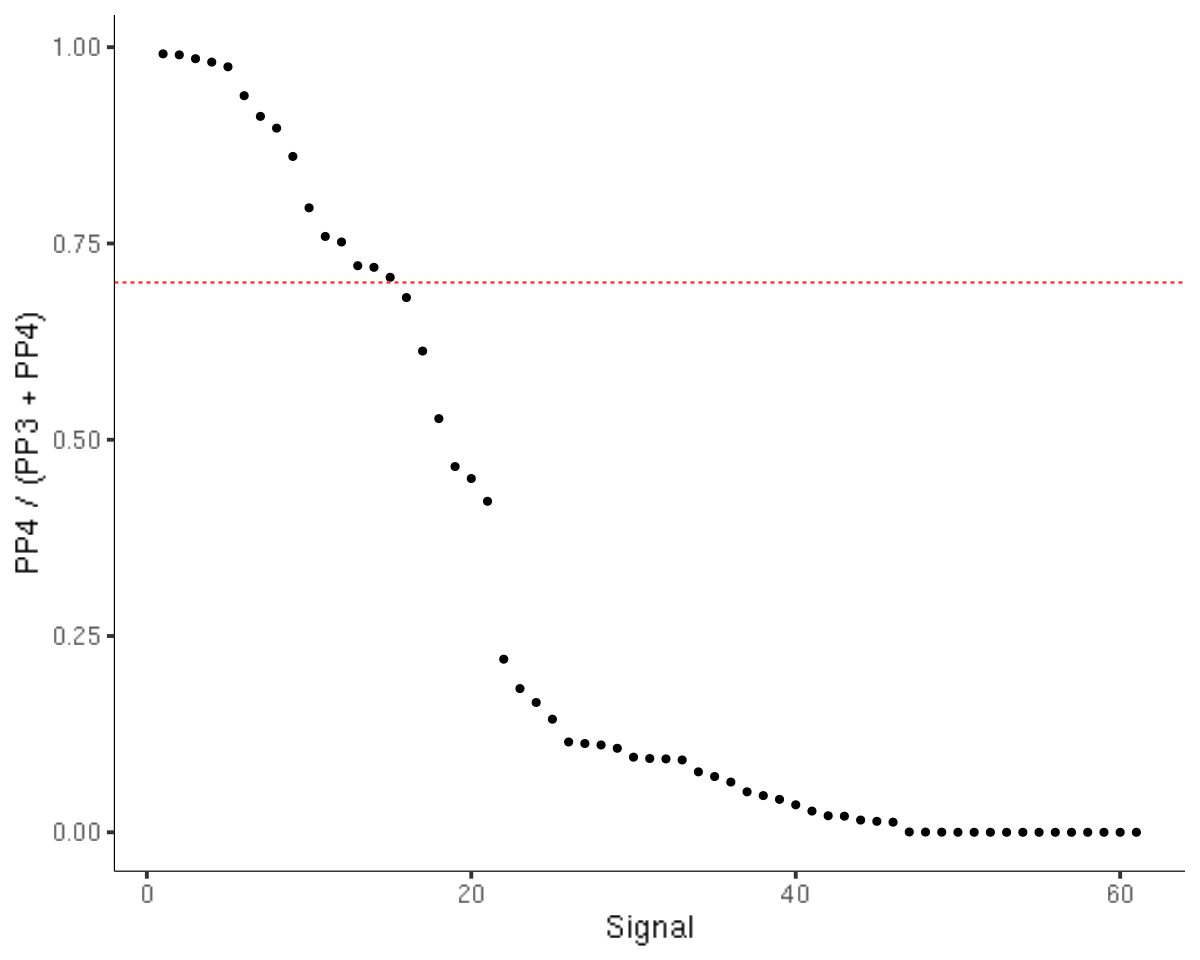

In [19]:
options(repr.plot.width=10, repr.plot.height=8)

coloc.res %>%
    dplyr::filter(PP.H3.abf + PP.H4.abf > 0.25) %>%
    dplyr::mutate(Coloc.Factor=PP.H4.abf / (PP.H3.abf + PP.H4.abf)) %>%
    dplyr::mutate(Rank=rank(-Coloc.Factor, ties.method="first")) %>%
    ggplot() +
    geom_point(aes(x=Rank, y=Coloc.Factor)) +
    geom_hline(aes(yintercept=0.7), lty=2, color="firebrick1") +
    xlab("Signal") + ylab("PP4 / (PP3 + PP4)") +
    ggplot_theme

In [20]:
colocalizing <- coloc.res %>%
    dplyr::filter(PP.H3.abf + PP.H4.abf > 0.25) %>%
    dplyr::mutate(Coloc.Factor=PP.H4.abf / (PP.H3.abf + PP.H4.abf)) %>%
    dplyr::filter(Coloc.Factor > 0.7) %>%
    dplyr::arrange(desc(Coloc.Factor))

Number of genes with evidence of colocalization with some protein?

In [21]:
length(unique(colocalizing$Gene))

[1] 14

In [22]:
colocalizing

nsnps,PP.H0.abf,PP.H1.abf,PP.H2.abf,PP.H3.abf,PP.H4.abf,Gene,eQTL.Signal,Coloc.Factor
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
14633,5.320397e-77,7.345925e-13,6.475099e-67,0.008481293,0.9915187,ENSG00000244731,1,0.9915187
1179,5.883175e-23,5.719145e-23,1.094464e-02,0.009660092,0.9793953,ENSG00000211640,1,0.9902330
2079,1.289400e-03,9.014653e-02,2.030398e-04,0.013300177,0.8950609,ENSG00000139178,2,0.9853580
2308,8.987999e-13,8.813751e-02,1.856469e-13,0.017310234,0.8945523,ENSG00000164692,1,0.9810166
768,7.274230e-02,1.372772e-02,1.103695e-01,0.020045503,0.7831150,ENSG00000211896,1,0.9750417
1357,5.883629e-10,3.163792e-03,1.161868e-08,0.061541589,0.9352946,ENSG00000176919,1,0.9382631
2733,3.167991e-28,5.482991e-02,4.862048e-28,0.083287868,0.8618822,ENSG00000257017,1,0.9118806
4558,2.867535e-36,1.140768e-01,2.315521e-36,0.091321848,0.7946014,ENSG00000198734,1,0.8969190
2407,0.000000e+00,1.612820e-01,0.000000e+00,0.116713696,0.7220043,ENSG00000123838,1,0.8608427


How many of those proteins are actually pQTL in *cis*?

In [23]:
sum(unique(colocalizing$Gene) %in% cis.pqtl.sig$Gene)

[1] 4

In [24]:
gene.info <- read.table("/nfs/team282/data/gains_team282/gene_info_864_20412_hla.txt") %>%
    dplyr::select(gene_id, gene_name)

In [25]:
colocalizing %>%
    dplyr::filter(Gene %in% cis.pqtl.sig$Gene) %>%
    merge(., gene.info, by.x="Gene", by.y="gene_id") %>%
    dplyr::arrange(desc(Coloc.Factor))

Gene,nsnps,PP.H0.abf,PP.H1.abf,PP.H2.abf,PP.H3.abf,PP.H4.abf,eQTL.Signal,Coloc.Factor,gene_name
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
ENSG00000244731,14633,5.320397e-77,7.345925e-13,6.475099e-67,0.008481293,0.9915187,1,0.9915187,C4A
ENSG00000211640,1179,5.883175e-23,5.719145e-23,1.094464e-02,0.009660092,0.9793953,1,0.9902330,IGLV6-57
ENSG00000173531,1717,5.171502e-12,3.319089e-12,3.030194e-01,0.193975941,0.5030046,1,0.7216910,MST1
ENSG00000000971,2527,1.924800e-70,2.331865e-69,2.367686e-02,0.286151137,0.6901720,1,0.7069094,CFH


In [26]:
colocalizing %>%
    dplyr::filter(!(Gene %in% cis.pqtl.sig$Gene)) %>%
    merge(., gene.info, by.x="Gene", by.y="gene_id") %>%
    dplyr::arrange(desc(Coloc.Factor))

Gene,nsnps,PP.H0.abf,PP.H1.abf,PP.H2.abf,PP.H3.abf,PP.H4.abf,eQTL.Signal,Coloc.Factor,gene_name
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
ENSG00000139178,2079,1.289400e-03,0.0901465303,2.030398e-04,0.01330018,0.8950609,2,0.9853580,C1RL
ENSG00000164692,2308,8.987999e-13,0.0881375144,1.856469e-13,0.01731023,0.8945523,1,0.9810166,COL1A2
ENSG00000211896,768,7.274230e-02,0.0137277197,1.103695e-01,0.02004550,0.7831150,1,0.9750417,IGHG1
ENSG00000176919,1357,5.883629e-10,0.0031637924,1.161868e-08,0.06154159,0.9352946,1,0.9382631,C8G
ENSG00000257017,2733,3.167991e-28,0.0548299102,4.862048e-28,0.08328787,0.8618822,1,0.9118806,HP
ENSG00000198734,4558,2.867535e-36,0.1140767549,2.315521e-36,0.09132185,0.7946014,1,0.8969190,F5
ENSG00000123838,2407,0.000000e+00,0.1612820399,0.000000e+00,0.11671370,0.7220043,1,0.8608427,C4BPA
ENSG00000161031,3526,1.265676e-07,0.0001388443,1.871625e-04,0.20452162,0.7951522,1,0.7954117,PGLYRP2
ENSG00000175899,2459,7.915166e-02,0.3071061496,3.600452e-02,0.13925802,0.4384796,2,0.7589598,A2M


A total of 10 genes were cis-pQTL and tested for colocalization, of which only 4 demonstrated evidence of colocalization.

In [27]:
coloc.res %>%
    dplyr::filter(Gene %in% cis.pqtl.sig$Gene) %>%
    dplyr::group_by(Gene) %>%
    dplyr::summarize(N=n()) %>%
    merge(., gene.info, by.x="Gene", by.y="gene_id")

Gene,N,gene_name
<chr>,<int>,<chr>
ENSG00000000971,1,CFH
ENSG00000100979,1,PLTP
ENSG00000162747,3,FCGR3B
ENSG00000164344,2,KLKB1
ENSG00000173531,1,MST1
ENSG00000197249,4,SERPINA1
ENSG00000211640,1,IGLV6-57
ENSG00000224389,3,C4B
ENSG00000228278,1,ORM2


An additional 2 were expressed genes that did not have eQTL.

In [28]:
cis.pqtl.sig %>%
    dplyr::group_by(Gene) %>%
    dplyr::summarize(N=n()) %>%
    dplyr::filter(Gene %in% gene.info$gene_id) %>%
    dplyr::filter(!(Gene %in% cis.eqtl.summary$Gene)) %>%
    merge(., gene.info, by.x="Gene", by.y="gene_id")

Gene,N,gene_name
<chr>,<int>,<chr>
ENSG00000130203,5,APOE
ENSG00000131187,5,F12


Finally, 11 genes were not expressed in whole blood leukocytes.

In [29]:
cis.pqtl.sig %>%
    dplyr::group_by(Gene) %>%
    dplyr::summarize(N=n()) %>%
    dplyr::filter(!(Gene %in% gene.info$gene_id)) %>%
    merge(., eqtl.pqtl.meta, by.x="Gene", by.y="Gene_ID") %>%
    dplyr::select(Gene, Gene.Names)

Gene,Gene.Names
<chr>,<chr>
ENSG00000005421,PON1
ENSG00000104760,FGL1
ENSG00000113889,KNG1
ENSG00000113905,HRG
ENSG00000120054,CPN1
ENSG00000135744,AGT
ENSG00000140093,SERPINA10
ENSG00000145192,AHSG
ENSG00000162267,ITIH3


## C4A and CFH

In [30]:
cis.eqtl.geno <- fread("~/gains_team282/nikhil/data/genotypes/eqtl_genotypes_6.raw", drop=2:6, sep=" ") %>%
    as.data.frame()

rownames(cis.eqtl.geno) <- cis.eqtl.geno$FID
cis.eqtl.geno$FID <- NULL
colnames(cis.eqtl.geno) <- gsub("_.*", "", colnames(cis.eqtl.geno))
cis.eqtl.geno <- as.matrix(cis.eqtl.geno)

In [31]:
cis.pqtl.geno <- fread("~/gains_team282/nikhil/data/genotypes/cis_pqtl_genotypes.raw", drop=2:6, sep=" ") %>%
    as.data.frame()

rownames(cis.pqtl.geno) <- cis.pqtl.geno$FID
cis.pqtl.geno$FID <- NULL
colnames(cis.pqtl.geno) <- gsub("_.*", "", colnames(cis.pqtl.geno))
cis.pqtl.geno <- as.matrix(cis.pqtl.geno)

In [32]:
c4a = "ENSG00000244731"

In [33]:
eqtl.snps <- unique(cis.eqtl.summary$SNP[cis.eqtl.summary$Gene == c4a])
pqtl.snps <- unique(cis.pqtl.summary$SNP[cis.pqtl.summary$Gene == c4a])

In [45]:
#eqtl.ld <- cor(cis.eqtl.geno[, eqtl.snps], use="pairwise.complete.obs")

In [46]:
#pqtl.ld <- cor(cis.pqtl.geno[, pqtl.snps], use="pairwise.complete.obs")

## FCGR3B

In [35]:
cis.eqtl.geno <- fread("~/gains_team282/nikhil/data/genotypes/eqtl_genotypes_1.raw", drop=2:6, sep=" ") %>%
    as.data.frame()

rownames(cis.eqtl.geno) <- cis.eqtl.geno$FID
cis.eqtl.geno$FID <- NULL
colnames(cis.eqtl.geno) <- gsub("_.*", "", colnames(cis.eqtl.geno))
cis.eqtl.geno <- as.matrix(cis.eqtl.geno)

In [36]:
cis.pqtl.geno <- fread("~/gains_team282/nikhil/data/genotypes/cis_pqtl_genotypes.raw", drop=2:6, sep=" ") %>%
    as.data.frame()

rownames(cis.pqtl.geno) <- cis.pqtl.geno$FID
cis.pqtl.geno$FID <- NULL
colnames(cis.pqtl.geno) <- gsub("_.*", "", colnames(cis.pqtl.geno))
cis.pqtl.geno <- as.matrix(cis.pqtl.geno)

In [37]:
fcgr3b = "ENSG00000162747"

In [38]:
eqtl.snps <- unique(cis.eqtl.summary$SNP[cis.eqtl.summary$Gene == fcgr3b])
pqtl.snps <- unique(cis.pqtl.summary$SNP[cis.pqtl.summary$Gene == fcgr3b])

In [39]:
eqtl.ld <- cor(cis.eqtl.geno[, eqtl.snps], use="pairwise.complete.obs")

In [40]:
pqtl.ld <- cor(cis.pqtl.geno[, pqtl.snps], use="pairwise.complete.obs")

In [41]:
eqtl.ld.by.lead <- cis.eqtl.summary %>%
    dplyr::filter(Gene == fcgr3b) %>%
    dplyr::group_by(Gene, Signal) %>%
    dplyr::slice_min(order_by=P_Value, n=1) %>%
    apply(., 1, function(x) {
        eqtl.ld[, x[4]] %>%
            as.data.frame() %>%
            dplyr::select(LD=1) %>%
            dplyr::mutate(Gene=x[1], Signal=x[2], SNP=rownames(.), LD=LD^2)
    }) %>%
    do.call(rbind, .)

In [42]:
pqtl.ld.by.lead <- cis.pqtl.summary %>%
    dplyr::filter(Gene == fcgr3b) %>%
    dplyr::group_by(pQTL_Protein) %>%
    dplyr::slice_min(order_by=pQTL_pval, n=1, with_ties=F) %>%
    apply(., 1, function(x) {
        pqtl.ld[, x[1]] %>%
            as.data.frame() %>%
            dplyr::select(LD=1) %>%
            dplyr::mutate(Gene=x[9], SNP=rownames(.), LD=LD^2)
    }) %>%
    do.call(rbind, .)

In [43]:
plot.data <- dplyr::bind_rows(
    cis.eqtl.summary %>%
        dplyr::filter(Gene == fcgr3b) %>%
        merge(., eqtl.ld.by.lead, by=c("Gene", "Signal", "SNP")) %>%
        dplyr::mutate(ID=paste0(Gene, "-", Signal), Log10P=-log10(P_Value)) %>%
        dplyr::select(ID, Position, Log10P, LD),
    cis.pqtl.summary %>%
        dplyr::filter(Gene == fcgr3b) %>%
        merge(., pqtl.ld.by.lead, by=c("Gene", "SNP")) %>%
        dplyr::mutate(Log10P=-log10(pQTL_pval)) %>%
        dplyr::select(ID=pQTL_Protein, Position, Log10P, LD)
)

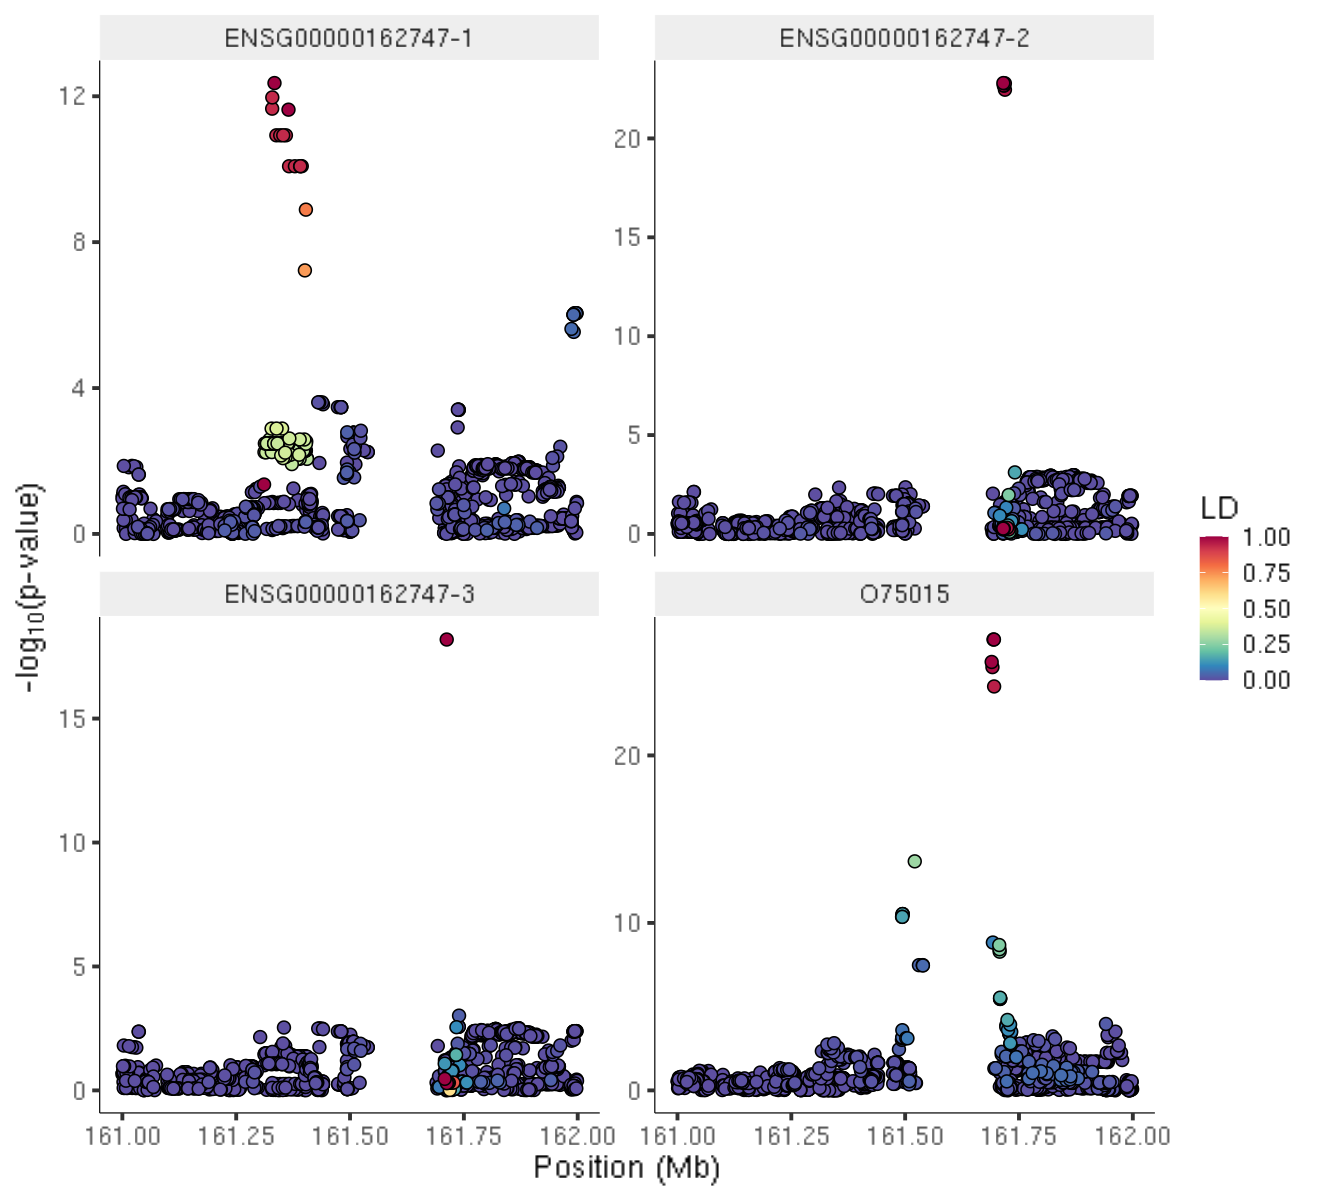

In [55]:
options(repr.plot.width=11, repr.plot.height=10)

palette <- colorRampPalette(rev(RColorBrewer::brewer.pal(11, "Spectral")))

plot.data %>%
    dplyr::filter(Position >= 161 * 10^6, Position <= 162 * 10^6) %>%
    dplyr::arrange(LD, Log10P) %>%
    ggplot() +
    geom_point(aes(x=Position / 10^6, y=Log10P, fill=LD), pch=21, size=I(3)) +
    scale_fill_gradientn(colors=palette(100), limits=c(0, 1)) +
    xlab("Position (Mb)") + ylab(bquote("-log"[10]*"(p-value)")) +
    facet_wrap(ID ~ ., scales="free_y") +
    ggplot_theme +
    theme(legend.position="right")

ggsave("01_Colocalization/results/fcgr3b_locus.pdf", width=11, height=10)

## ORM2

In [56]:
cis.eqtl.geno <- fread("~/gains_team282/nikhil/data/genotypes/eqtl_genotypes_9.raw", drop=2:6, sep=" ") %>%
    as.data.frame()

rownames(cis.eqtl.geno) <- cis.eqtl.geno$FID
cis.eqtl.geno$FID <- NULL
colnames(cis.eqtl.geno) <- gsub("_.*", "", colnames(cis.eqtl.geno))
cis.eqtl.geno <- as.matrix(cis.eqtl.geno)

In [57]:
cis.pqtl.geno <- fread("~/gains_team282/nikhil/data/genotypes/cis_pqtl_genotypes.raw", drop=2:6, sep=" ") %>%
    as.data.frame()

rownames(cis.pqtl.geno) <- cis.pqtl.geno$FID
cis.pqtl.geno$FID <- NULL
colnames(cis.pqtl.geno) <- gsub("_.*", "", colnames(cis.pqtl.geno))
cis.pqtl.geno <- as.matrix(cis.pqtl.geno)

In [58]:
orm2 = "ENSG00000228278"

In [59]:
eqtl.snps <- unique(cis.eqtl.summary$SNP[cis.eqtl.summary$Gene == orm2])
pqtl.snps <- unique(cis.pqtl.summary$SNP[cis.pqtl.summary$Gene == orm2])

In [60]:
eqtl.ld <- cor(cis.eqtl.geno[, eqtl.snps], use="pairwise.complete.obs")

In [61]:
pqtl.ld <- cor(cis.pqtl.geno[, pqtl.snps], use="pairwise.complete.obs")

In [62]:
eqtl.ld.by.lead <- cis.eqtl.summary %>%
    dplyr::filter(Gene == orm2) %>%
    dplyr::group_by(Gene, Signal) %>%
    dplyr::slice_min(order_by=P_Value, n=1) %>%
    apply(., 1, function(x) {
        eqtl.ld[, x[4]] %>%
            as.data.frame() %>%
            dplyr::select(LD=1) %>%
            dplyr::mutate(Gene=x[1], Signal=x[2], SNP=rownames(.), LD=LD^2)
    }) %>%
    do.call(rbind, .)

In [63]:
pqtl.ld.by.lead <- cis.pqtl.summary %>%
    dplyr::filter(Gene == orm2) %>%
    dplyr::group_by(pQTL_Protein) %>%
    dplyr::slice_min(order_by=pQTL_pval, n=1, with_ties=F) %>%
    apply(., 1, function(x) {
        pqtl.ld[, x[1]] %>%
            as.data.frame() %>%
            dplyr::select(LD=1) %>%
            dplyr::mutate(Gene=x[9], SNP=rownames(.), LD=LD^2)
    }) %>%
    do.call(rbind, .)

In [64]:
plot.data <- dplyr::bind_rows(
    cis.eqtl.summary %>%
        dplyr::filter(Gene == orm2) %>%
        merge(., eqtl.ld.by.lead, by=c("Gene", "Signal", "SNP")) %>%
        dplyr::mutate(ID=paste0(Gene, "-", Signal), Log10P=-log10(P_Value)) %>%
        dplyr::select(ID, Position, Log10P, LD),
    cis.pqtl.summary %>%
        dplyr::filter(Gene == orm2) %>%
        merge(., pqtl.ld.by.lead, by=c("Gene", "SNP")) %>%
        dplyr::mutate(Log10P=-log10(pQTL_pval)) %>%
        dplyr::select(ID=pQTL_Protein, Position, Log10P, LD)
)

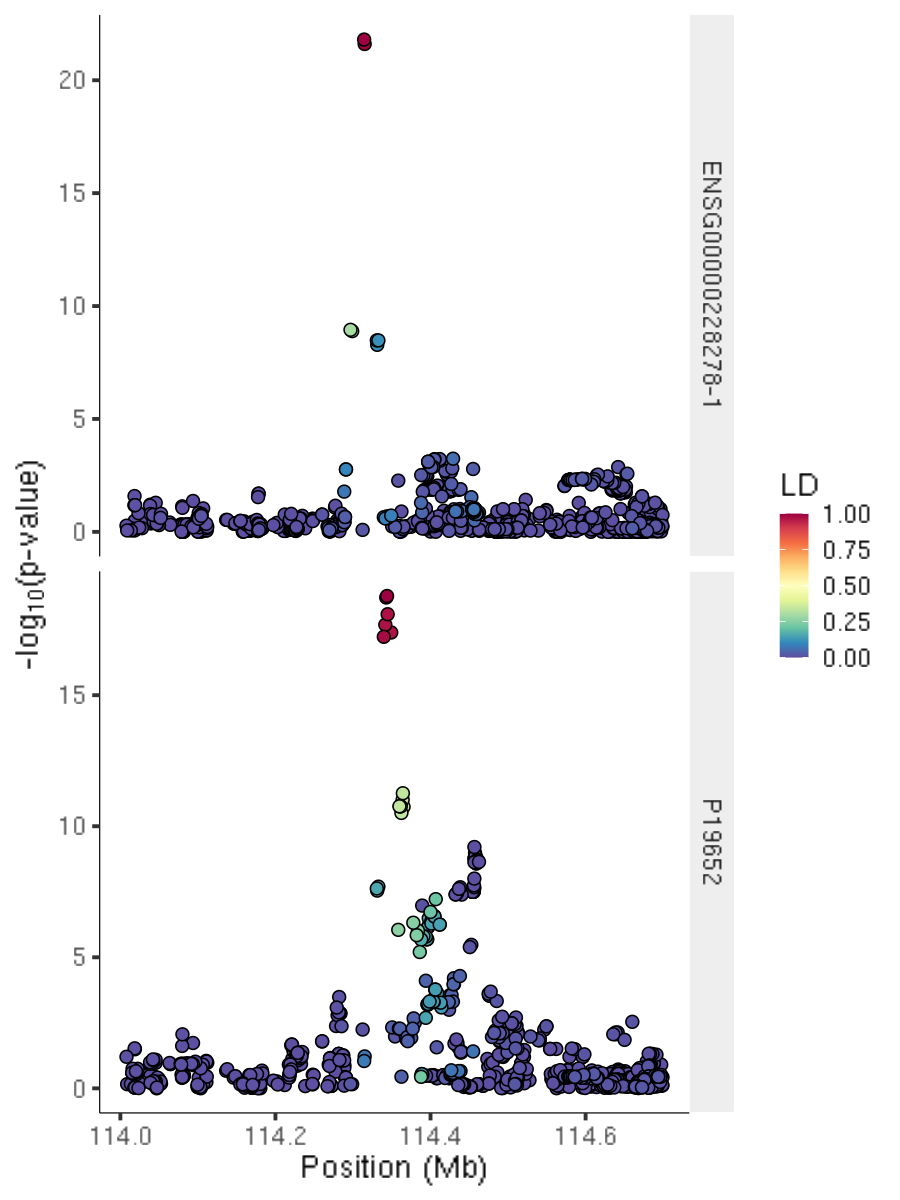

In [70]:
options(repr.plot.width=7.5, repr.plot.height=10)

palette <- colorRampPalette(rev(RColorBrewer::brewer.pal(11, "Spectral")))

plot.data %>%
    dplyr::filter(Position >= 114 * 10^6, Position <= 114.7 * 10^6) %>%
    dplyr::arrange(LD, Log10P) %>%
    ggplot() +
    geom_point(aes(x=Position / 10^6, y=Log10P, fill=LD), pch=21, size=I(3)) +
    scale_fill_gradientn(colors=palette(100), limits=c(0, 1)) +
    xlab("Position (Mb)") + ylab(bquote("-log"[10]*"(p-value)")) +
    facet_grid(ID ~ ., scales="free_y") +
    ggplot_theme +
    theme(legend.position="right")

ggsave("01_Colocalization/results/orm2_locus.pdf", width=7.5, height=10)

## Correlation of Colocalising QTL

Do cis-eQTL and cis-pQTl that colocalize also have highly correlated eGenes/pGenes?